## you can eather do the data loading and correlation step by step

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import nanooptics as nopt

In [22]:
header, channel, timetag = nopt.read_tcspc.read_pt2('./sample_data.pt2')
time, g2, g2_error = nopt.cycorr.corr(channel, timetag, 500e-9, 400e-12)

{'ASCII': {'Identifier': 'PicoHarp 300\x00\x00\x00\x00', 'Format Version': '2.0\x00\x00\x00', 'Creator Name': 'PicoHarp Software\x00', 'Creator Version': '2.3.0.0\x00\x00\x00\x00\x00', 'File Time': '29/01/16 17:09:43\x00', 'CRLF': '\r\n', 'Comment': 'T2 Mode\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

<Container object of 3 artists>

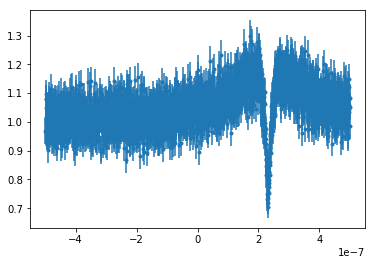

In [25]:
print(header)
plt.errorbar(time, g2, g2_error, fmt='.')

## or you just use the helper class wich also provides simple fitting with lmfit for typical systems and more

In [ ]:
%matplotlib inline
import nanooptics.photophysics as pp
import matplotlib.pyplot as plt

In [29]:
tt = pp.TimeTagMeasurement(pt2_filepath='./sample_data.pt2', g2_cutofftime=500e-9, g2_resolution=400e-12)

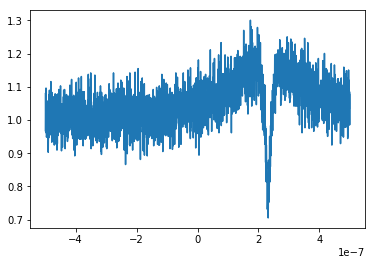

In [30]:
plt.plot(tt.g2_time, tt.g2_normalized)

In [ ]:
tt.fit(tau0=2.3e-7, t_antibunch=1e-8,  a_bunch=[0.2], t_bunch=[1e-7])
print(tt.fitresult.fit_report())
tt.fitresult.plot()